<a href="https://colab.research.google.com/github/ChampiChampiAbraham/Curso_Laboratorio_Software_I/blob/master/Pandemia_Civid2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Predicción de Enfermedad: covid_19**

**Integrantes:**
- Champi Champi Abraham               133960
- Del Castillo Ovalle         	      183369
- Huaman Atayapanqui Lisbet Paola     184203
- Sanca Zevallos Jery                 184655
- Ichu Valencia Miguel Humberto       184650

# <font color=dark red>**1. Análisis**</font> 

In [2]:
#https://www.dropbox.com/s/u9e7ch3fkdlx5xj/pm21Septiembre2022.zip?dl=0
!wget https://www.dropbox.com/s/u9e7ch3fkdlx5xj/pm21Septiembre2022.zip
!unzip pm21Septiembre2022.zip

--2022-09-07 13:48:51--  https://www.dropbox.com/s/u9e7ch3fkdlx5xj/pm21Septiembre2022.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/u9e7ch3fkdlx5xj/pm21Septiembre2022.zip [following]
--2022-09-07 13:48:51--  https://www.dropbox.com/s/raw/u9e7ch3fkdlx5xj/pm21Septiembre2022.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6149c77f4d0098dfaf78d91fcb.dl.dropboxusercontent.com/cd/0/inline/Bsf3ivNEEkuHCnmTbZL6FIJ-1eEakrWIbVRfLD0j6NoeXFAVpQ1eElkLFYLgse1mKk1a20vzDDWuok8LodAMmNLdxmLCGdnbO3ebY8kCi6tak5EoXlX3H0F7G-RZ2t71O-h2YhTX_LBFAo2s51KRWZIpdq3ruEUBOrb8-pNup7G7EQ/file# [following]
--2022-09-07 13:48:52--  https://uc6149c77f4d0098dfaf78d91fcb.dl.dropboxusercontent.com/cd/0/inline/Bsf3ivNEEkuHCnmTbZL6FIJ-1eEakrWIbVRfLD0j6NoeXFAVpQ

In [3]:
import io
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
data = pd.read_csv('pm21Septiembre2021.csv')

In [4]:
#Mostrar todas las columnas del dataframe
data.columns

Index(['FECHA_CORTE', 'UUID', 'FECHA_MUESTRA', 'Edad', 'Sexo', 'Institucion',
       'UBIGEO_PACIENTE', 'DEPARTAMENTO_PACIENTE', 'PROVINCIA_PACIENTE',
       'DISTRITO_PACIENTE', 'DEPARTAMENTO_MUESTRA', 'PROVINCIA_MUESTRA',
       'DISTRITO_MUESTRA', 'TIPO_MUESTRA', 'RESULTADO'],
      dtype='object')

In [5]:
#Visualizar los primeros datos
data.head()

,FECHA_CORTE,UUID,FECHA_MUESTRA,Edad,Sexo,Institucion,UBIGEO_PACIENTE,DEPARTAMENTO_PACIENTE,PROVINCIA_PACIENTE,DISTRITO_PACIENTE,DEPARTAMENTO_MUESTRA,PROVINCIA_MUESTRA,DISTRITO_MUESTRA,TIPO_MUESTRA,RESULTADO
0,20210921,4556077.0,20200621,51,FEMENINO,ESSALUD,140130,LIMA,LIMA,SANTIAGO DE SURCO,LIMA,LIMA,JESUS MARIA,HISOPADO NASAL Y FARINGEO,NEGATIVO
1,20210921,17288705.0,20200622,38,MASCULINO,MINISTERIO DE SALUD - DIRIS,140137,LIMA,LIMA,SAN JUAN DE LURIGANCHO,LIMA,LIMA,MAGDALENA DEL MAR,HISOPADO NASAL Y FARINGEO,NEGATIVO
2,20210921,36391920.0,20200621,63,MASCULINO,ESSALUD,140133,LIMA,LIMA,JESUS MARIA,LIMA,LIMA,JESUS MARIA,HISOPADO NASAL Y FARINGEO,POSITIVO
3,20210921,23212698.0,20200622,34,FEMENINO,GOBIERNO REGIONAL,140405,LIMA,CAÑETE,CHILCA,LIMA,CAÑETE,CHILCA,HISOPADO NASAL Y FARINGEO,NEGATIVO
4,20210921,NaN,20200622,0,FEMENINO,ESSALUD,140131,LIMA,LIMA,SURQUILLO,JUNIN,YAULI,SANTA ROSA DE SACCO,HISOPADO NASAL Y FARINGEO,NEGATIVO


In [6]:
#Visualizar los ultimos datos
data.tail()

,FECHA_CORTE,UUID,FECHA_MUESTRA,Edad,Sexo,Institucion,UBIGEO_PACIENTE,DEPARTAMENTO_PACIENTE,PROVINCIA_PACIENTE,DISTRITO_PACIENTE,DEPARTAMENTO_MUESTRA,PROVINCIA_MUESTRA,DISTRITO_MUESTRA,TIPO_MUESTRA,RESULTADO
99994,20210921,34527113.0,20200718,32,FEMENINO,PRIVADO,140101,LIMA,LIMA,LIMA,LIMA,LIMA,JESUS MARIA,HISOPADO NASAL Y FARINGEO,POSITIVO
99995,20210921,2175233.0,20200718,62,MASCULINO,PRIVADO,140126,LIMA,LIMA,SAN MARTIN DE PORRES,LIMA,LIMA,PUEBLO LIBRE (MAGDALENA VIEJA),HISOPADO NASAL Y FARINGEO,POSITIVO
99996,20210921,1981005.0,20200717,44,MASCULINO,MINISTERIO DE SALUD - DIRIS,140136,LIMA,LIMA,SAN JUAN DE MIRAFLORES,LIMA,LIMA,LIMA,HISOPADO NASAL Y FARINGEO,NEGATIVO
99997,20210921,11886065.0,20200717,43,MASCULINO,PRIVADO,140114,LIMA,LIMA,MAGDALENA DEL MAR,LIMA,LIMA,JESUS MARIA,HISOPADO NASAL Y FARINGEO,POSITIVO
99998,20210921,12238373.0,20200717,57,FEMENINO,MINISTERIO DE SALUD - DIRIS,140126,LIMA,LIMA,SAN MARTIN DE PORRES,LIMA,LIMA,LIMA,HISOPADO NASAL Y FARINGEO,NEGATIVO


In [7]:
# Muestra informacion de los datos cargados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FECHA_CORTE            99999 non-null  int64  
 1   UUID                   95238 non-null  float64
 2   FECHA_MUESTRA          99999 non-null  int64  
 3   Edad                   99999 non-null  int64  
 4   Sexo                   99999 non-null  object 
 5   Institucion            99999 non-null  object 
 6   UBIGEO_PACIENTE        99999 non-null  int64  
 7   DEPARTAMENTO_PACIENTE  99999 non-null  object 
 8   PROVINCIA_PACIENTE     99999 non-null  object 
 9   DISTRITO_PACIENTE      99999 non-null  object 
 10  DEPARTAMENTO_MUESTRA   99999 non-null  object 
 11  PROVINCIA_MUESTRA      99999 non-null  object 
 12  DISTRITO_MUESTRA       99999 non-null  object 
 13  TIPO_MUESTRA           99999 non-null  object 
 14  RESULTADO              99999 non-null  object 
dtypes:

In [8]:
# Mostrar las estadísticas sumarias del Data Frame
data.describe()

,FECHA_CORTE,UUID,FECHA_MUESTRA,Edad,UBIGEO_PACIENTE
count,99999.0,9.523800e+04,9.999900e+04,99999.000000,99999.000000
mean,20210921.0,1.597763e+07,2.020068e+07,40.753658,129731.335263
std,0.0,1.059808e+07,2.311962e+02,17.426305,49717.879150
min,20210921.0,1.100000e+01,2.020031e+07,0.000000,10000.000000
25%,20210921.0,6.625167e+06,2.020063e+07,30.000000,120107.000000
50%,20210921.0,1.457003e+07,2.020070e+07,39.000000,140119.000000
75%,20210921.0,2.367317e+07,2.020071e+07,52.000000,140137.000000
max,20210921.0,3.729464e+07,2.021030e+07,120.000000,780000.000000


# <font color=dark red>**3. Preprocesamiento de datos**</font> 



In [9]:
#Eliminamos datos que no son necesarios
data = data.drop(columns=['Institucion'])
data = data.drop(columns=['DEPARTAMENTO_MUESTRA'])
data = data.drop(columns=['PROVINCIA_MUESTRA'])
data = data.drop(columns=['DISTRITO_MUESTRA'])
data = data.drop(columns=['FECHA_MUESTRA'])
data = data.drop(columns=['UUID'])
data = data.drop(columns=['FECHA_CORTE'])
data = data.drop(columns=['UBIGEO_PACIENTE'])
data = data.drop(columns=['PROVINCIA_PACIENTE'])
data = data.drop(columns=['DISTRITO_PACIENTE'])

data = data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Edad                   99999 non-null  int64 
 1   Sexo                   99999 non-null  object
 2   DEPARTAMENTO_PACIENTE  99999 non-null  object
 3   TIPO_MUESTRA           99999 non-null  object
 4   RESULTADO              99999 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [10]:
#Extraer los atributos importantes
datosModelo=data
datosModelo

,Edad,Sexo,DEPARTAMENTO_PACIENTE,TIPO_MUESTRA,RESULTADO
0,51,FEMENINO,LIMA,HISOPADO NASAL Y FARINGEO,NEGATIVO
1,38,MASCULINO,LIMA,HISOPADO NASAL Y FARINGEO,NEGATIVO
2,63,MASCULINO,LIMA,HISOPADO NASAL Y FARINGEO,POSITIVO
3,34,FEMENINO,LIMA,HISOPADO NASAL Y FARINGEO,NEGATIVO
4,0,FEMENINO,LIMA,HISOPADO NASAL Y FARINGEO,NEGATIVO
...,...,...,...,...,...
99994,32,FEMENINO,LIMA,HISOPADO NASAL Y FARINGEO,POSITIVO
99995,62,MASCULINO,LIMA,HISOPADO NASAL Y FARINGEO,POSITIVO
99996,44,MASCULINO,LIMA,HISOPADO NASAL Y FARINGEO,NEGATIVO
99997,43,MASCULINO,LIMA,HISOPADO NASAL Y FARINGEO,POSITIVO


**Categorización de Datos**


In [11]:
#Valores unicos por columna
datosModelo['Sexo'].unique()

array(['FEMENINO', 'MASCULINO'], dtype=object)

In [12]:
#Valores unicos por columna
datosModelo['DEPARTAMENTO_PACIENTE'].unique()

array(['LIMA', '   ', 'JUNIN', 'PIURA', 'CUSCO', 'ANCASH', 'ICA',
       'LORETO', 'APURIMAC', 'CAJAMARCA', 'AREQUIPA', 'MOQUEGUA', 'PASCO',
       'LA LIBERTAD', 'AYACUCHO', 'TACNA', 'LAMBAYEQUE', 'TUMBES',
       'SAN MARTIN', 'PUNO', 'HUANCAVELICA', 'HUANUCO', 'UCAYALI',
       'AMAZONAS', 'MADRE DE DIOS', 'SIN DATOS'], dtype=object)

In [13]:
#Valores unicos por columna
datosModelo['TIPO_MUESTRA'].unique()

array(['HISOPADO NASAL Y FARINGEO', 'LAVADO BRONCOALVEOLAR',
       'ASPIRADO TRAQUEAL'], dtype=object)

In [14]:
#Valores unicos por columna
datosModelo['RESULTADO'].unique()

array(['NEGATIVO', 'POSITIVO'], dtype=object)

Codificacion Ordinal

In [15]:
categoria_Sexo = ["FEMENINO", "MASCULINO"]
categoria_Departamento = ['LIMA', 'JUNIN', 'PIURA', 'CUSCO', 'ANCASH', 'ICA',
       'LORETO', 'APURIMAC', 'CAJAMARCA', 'AREQUIPA', 'MOQUEGUA', 'PASCO',
       'LA LIBERTAD', 'AYACUCHO', 'TACNA', 'LAMBAYEQUE', 'TUMBES',
       'SAN MARTIN', 'PUNO', 'HUANCAVELICA', 'HUANUCO', 'UCAYALI',
       'AMAZONAS', 'MADRE DE DIOS','   ', 'SIN DATOS']
categoria_TIPO_MUESTRA = ['HISOPADO NASAL Y FARINGEO', 'LAVADO BRONCOALVEOLAR',
       'ASPIRADO TRAQUEAL']
categoria_RESULTADO =['NEGATIVO', 'POSITIVO']      


In [16]:
# Convertimos a datos numérico
from sklearn.preprocessing import OrdinalEncoder

datos_ord = pd.DataFrame(datosModelo)

codificador = OrdinalEncoder(categories = [categoria_Sexo, categoria_Departamento,categoria_TIPO_MUESTRA,categoria_RESULTADO])

datos_ord = pd.DataFrame(codificador.fit_transform(datos_ord[['Sexo', 'DEPARTAMENTO_PACIENTE','TIPO_MUESTRA','RESULTADO']]),   columns= ['Sexo', 'DEPARTAMENTO_PACIENTE','TIPO_MUESTRA','RESULTADO'])

datos_ord

,Sexo,DEPARTAMENTO_PACIENTE,TIPO_MUESTRA,RESULTADO
0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
...,...,...,...,...
99994,0.0,0.0,0.0,1.0
99995,1.0,0.0,0.0,1.0
99996,1.0,0.0,0.0,0.0
99997,1.0,0.0,0.0,1.0


In [17]:
datosModeloCod = datosModelo[['Edad']]

# Insertar las columnas de "Sexo" y "Dx_Anemia"
datosModeloCod.insert(1,"Sexo",datos_ord['Sexo'])
datosModeloCod.insert(2,"DEPARTAMENTO_PACIENTE",datos_ord['DEPARTAMENTO_PACIENTE'])
datosModeloCod.insert(3,"TIPO_MUESTRA	",datos_ord['TIPO_MUESTRA'])
datosModeloCod.insert(4,"RESULTADO",datos_ord['RESULTADO'])
# Mostrar
datosModeloCod

,Edad,Sexo,DEPARTAMENTO_PACIENTE,TIPO_MUESTRA\t,RESULTADO
0,51,0.0,0.0,0.0,0.0
1,38,1.0,0.0,0.0,0.0
2,63,1.0,0.0,0.0,1.0
3,34,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
99994,32,0.0,0.0,0.0,1.0
99995,62,1.0,0.0,0.0,1.0
99996,44,1.0,0.0,0.0,0.0
99997,43,1.0,0.0,0.0,1.0


In [18]:
#Verificar el tipo de dato de cada columna
datosModeloCod.dtypes

Edad                       int64
Sexo                     float64
DEPARTAMENTO_PACIENTE    float64
TIPO_MUESTRA\t           float64
RESULTADO                float64
dtype: object

In [19]:
# Verificar elementos no nulos en cada columna
print('Verificar elmentos nulos por columnas: ') 
print(datosModeloCod.isna().sum(axis = 0))

Verificar elmentos nulos por columnas: 
Edad                     0
Sexo                     0
DEPARTAMENTO_PACIENTE    0
TIPO_MUESTRA\t           0
RESULTADO                0
dtype: int64



# <font color=dark red>**3. Infornación gráfica de los datos**</font> 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0, 0.5, 'Cantidad de pacientes')

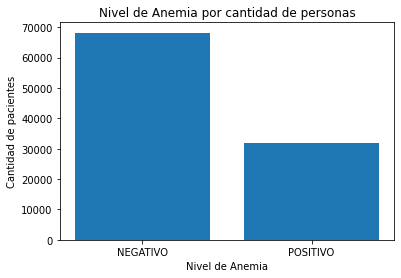

In [20]:
x_values = data.RESULTADO.unique()
y_values = data.RESULTADO.value_counts().tolist()
plt.figure()    #Figura. Puede incluirse el tamaño con figsize
plt.bar(x_values, y_values)          #El gráfico
plt.title('Nivel de Anemia por cantidad de personas')      #El título
ax = plt.subplot()                   #Axis
ax.set_xticks(x_values)             #Eje x
ax.set_xticklabels(x_values)        #Etiquetas del eje x
ax.set_xlabel('Nivel de Anemia')  #Nombre del eje x
ax.set_ylabel('Cantidad de pacientes')  #Nombre del eje y

In [21]:
datosModelo

,Edad,Sexo,DEPARTAMENTO_PACIENTE,TIPO_MUESTRA,RESULTADO
0,51,FEMENINO,LIMA,HISOPADO NASAL Y FARINGEO,NEGATIVO
1,38,MASCULINO,LIMA,HISOPADO NASAL Y FARINGEO,NEGATIVO
2,63,MASCULINO,LIMA,HISOPADO NASAL Y FARINGEO,POSITIVO
3,34,FEMENINO,LIMA,HISOPADO NASAL Y FARINGEO,NEGATIVO
4,0,FEMENINO,LIMA,HISOPADO NASAL Y FARINGEO,NEGATIVO
...,...,...,...,...,...
99994,32,FEMENINO,LIMA,HISOPADO NASAL Y FARINGEO,POSITIVO
99995,62,MASCULINO,LIMA,HISOPADO NASAL Y FARINGEO,POSITIVO
99996,44,MASCULINO,LIMA,HISOPADO NASAL Y FARINGEO,NEGATIVO
99997,43,MASCULINO,LIMA,HISOPADO NASAL Y FARINGEO,POSITIVO


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


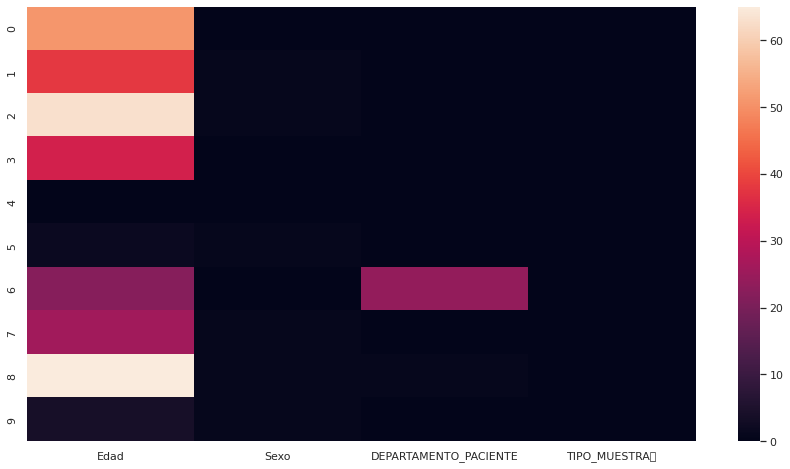

In [22]:
import seaborn as sns
dataFinal=datosModeloCod
muestra10 = dataFinal.iloc[:10, :4]
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(muestra10);

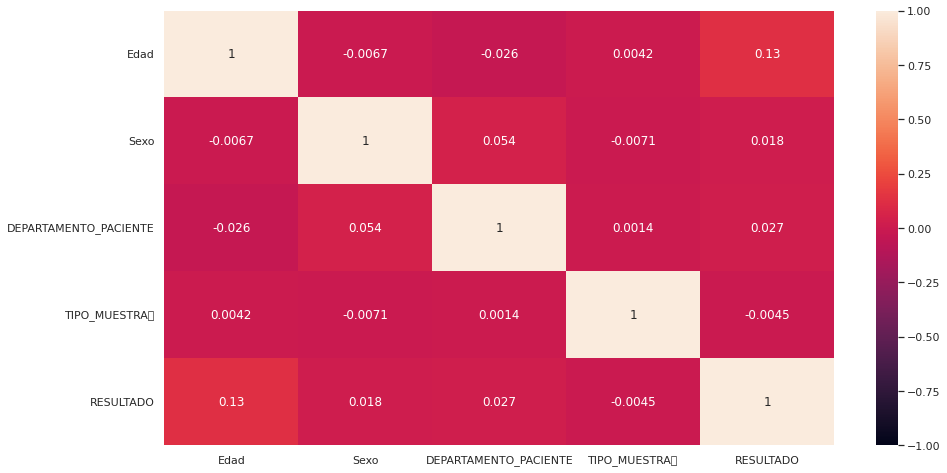

In [23]:
sns.heatmap(dataFinal.corr(), annot=True, vmin=-1 , vmax=1);

In [24]:
muestra = dataFinal.iloc[0:10, 0:3]

dataFinal_muestra=muestra.set_index('Edad') # indexamos por la columna Country. Eliminamos los indices por defecto
dataFinal_muestra

,Sexo,DEPARTAMENTO_PACIENTE
Edad,,
51,0.0,0.0
38,1.0,0.0
63,1.0,0.0
34,0.0,0.0
0,0.0,0.0
2,1.0,0.0
22,0.0,24.0
26,1.0,0.0
65,1.0,1.0


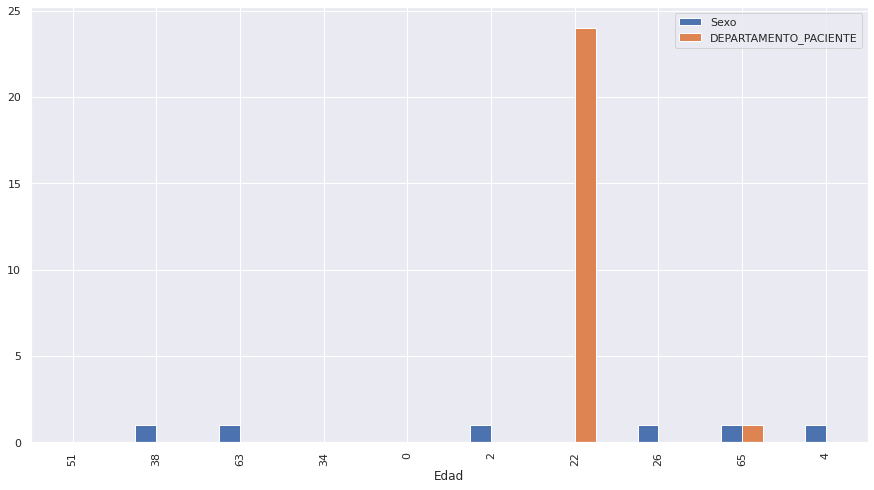

In [25]:
dataFinal_muestra.plot(kind='bar')


# <font color=dark red>**4. Modelos de clasificación**</font> 

**Normalizacion de datos**

In [26]:
import matplotlib.pyplot as plt
from sklearn import preprocessing

# los datos de vinos son puestos en una misma escala
# utilizando la desviación estandar con valor 1 y la media con valor 0
datos_standar_scaler = preprocessing.StandardScaler().fit_transform(dataFinal)
# estandarizado = (X - media) / std

print(datos_standar_scaler)

[[ 0.58798429 -1.11104221 -0.62707014 -0.05116817 -0.68328965]
 [-0.15801808  0.90005581 -0.62707014 -0.05116817 -0.68328965]
 [ 1.27660187  0.90005581 -0.62707014 -0.05116817  1.46350819]
 ...
 [ 0.18629071  0.90005581 -0.62707014 -0.05116817 -0.68328965]
 [ 0.12890591  0.90005581 -0.62707014 -0.05116817  1.46350819]
 [ 0.93229308 -1.11104221 -0.62707014 -0.05116817 -0.68328965]]


In [27]:
# Se convierte el vector de numpy en  DataFrame
datos_standar_scaler = pd.DataFrame(datos_standar_scaler, columns=['Edad','Sexo', 'DEPARTAMENTO_PACIENTE','TIPO_MUESTRA','RESULTADO'])
datos_standar_scaler = datos_standar_scaler.astype(float)
datos_standar_scaler

,Edad,Sexo,DEPARTAMENTO_PACIENTE,TIPO_MUESTRA,RESULTADO
0,0.587984,-1.111042,-0.62707,-0.051168,-0.683290
1,-0.158018,0.900056,-0.62707,-0.051168,-0.683290
2,1.276602,0.900056,-0.62707,-0.051168,1.463508
3,-0.387557,-1.111042,-0.62707,-0.051168,-0.683290
4,-2.338640,-1.111042,-0.62707,-0.051168,-0.683290
...,...,...,...,...,...
99994,-0.502327,-1.111042,-0.62707,-0.051168,1.463508
99995,1.219217,0.900056,-0.62707,-0.051168,1.463508
99996,0.186291,0.900056,-0.62707,-0.051168,-0.683290
99997,0.128906,0.900056,-0.62707,-0.051168,1.463508


**Datos de entrenamiento y datos de prueba**

In [28]:
#Libreria
from sklearn.model_selection import train_test_split

#Separacion de datos

#Todas las columnas del dataframe homogenizado excepto la columna "RESULTADO"", corresponde a X
X = datos_standar_scaler.drop("RESULTADO", axis=1)

#los datos originales de la columna de "Dx_Anemia", corresponde a Y
y = dataFinal.RESULTADO

# dividimos en conjunto de entrenamiento (train) y conjunto de prueba (test)
# Los datos de entrenamiento será 70% y para la prueba será el 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3,
                                                    random_state = 42,
                                                    stratify = y)

**Modelado**

In [29]:
#Instanciamos los modelos de clasificacion
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree

**Random Forest**

In [30]:
# Construimos los modelos de clasificación
clasificador1 = RandomForestClassifier()

# Entrenamos el modelo usando el conjunto de entranamiento
RandomForest  = clasificador1.fit(X_train, y_train)

# Predicción en el conjunto de prueba
y_pred1 = RandomForest.predict(X_test)

In [31]:
# Evaluación de métricas
from sklearn.metrics import classification_report
print("Clasificador 1: Random Forest \n")
print(classification_report(y_test, y_pred1))

Clasificador 1: Random Forest 

              precision    recall  f1-score   support

         0.0       0.70      0.94      0.80     20452
         1.0       0.49      0.12      0.19      9548

    accuracy                           0.68     30000
   macro avg       0.59      0.53      0.50     30000
weighted avg       0.63      0.68      0.61     30000



**Naives**

In [32]:
# Construimos los modelos de clasificación
clasificador2 = GaussianNB()

# Entrenamos el modelo usando el conjunto de entranamiento
RandomForest  = clasificador2.fit(X_train, y_train)

# Predicción en el conjunto de prueba
y_pred2 = RandomForest.predict(X_test)

In [33]:
# Evaluación de métricas
from sklearn.metrics import classification_report
print("Clasificador 2: GaussianNB \n")
print(classification_report(y_test, y_pred2))

Clasificador 2: GaussianNB 

              precision    recall  f1-score   support

         0.0       0.68      1.00      0.81     20452
         1.0       0.58      0.01      0.01      9548

    accuracy                           0.68     30000
   macro avg       0.63      0.50      0.41     30000
weighted avg       0.65      0.68      0.56     30000



**Arbol de Decision**

In [34]:
# Construimos los modelos de clasificación
clasificador3 = tree.DecisionTreeClassifier(max_depth=3, criterion="entropy")

# Entrenamos el modelo usando el conjunto de entrenamiento
RandomForest  = clasificador3.fit(X_train, y_train)

# Predicción en el conjunto de prueba
y_pred3 = RandomForest.predict(X_test)

In [35]:
# Evaluación de métricas
from sklearn.metrics import classification_report
print("Clasificador 3: Arbol de Decision \n")
print(classification_report(y_test, y_pred3))

Clasificador 3: Arbol de Decision 

              precision    recall  f1-score   support

         0.0       0.69      0.96      0.81     20452
         1.0       0.52      0.08      0.14      9548

    accuracy                           0.68     30000
   macro avg       0.61      0.52      0.47     30000
weighted avg       0.64      0.68      0.59     30000



**Accuracy**

In [36]:
#Exactitud: La métrica accuracy representa el porcentaje total de valores 
#correctamente clasificados, tanto positivos como negativos

from sklearn.metrics import accuracy_score
# Calculamos el accuracy de cada modelo, utilizando los valores reales y los predichos de los datos de prueba
print("Accuracy RandomForest :", accuracy_score(y_test, y_pred1))
print("Accuracy NaiveBayes   :", accuracy_score(y_test, y_pred2))
print("Accuracy ArbolDecision:", accuracy_score(y_test, y_pred3))


Accuracy RandomForest : 0.6794333333333333
Accuracy NaiveBayes   : 0.6823666666666667
Accuracy ArbolDecision: 0.6837


**Curva ROC**

Sin entrenar: 		ROC AUC=0.500
Ramdon Forest: 		ROC AUC=0.530
Naive Bayes: 		ROC AUC=0.502
Arbol de Decision: 	ROC AUC=0.523


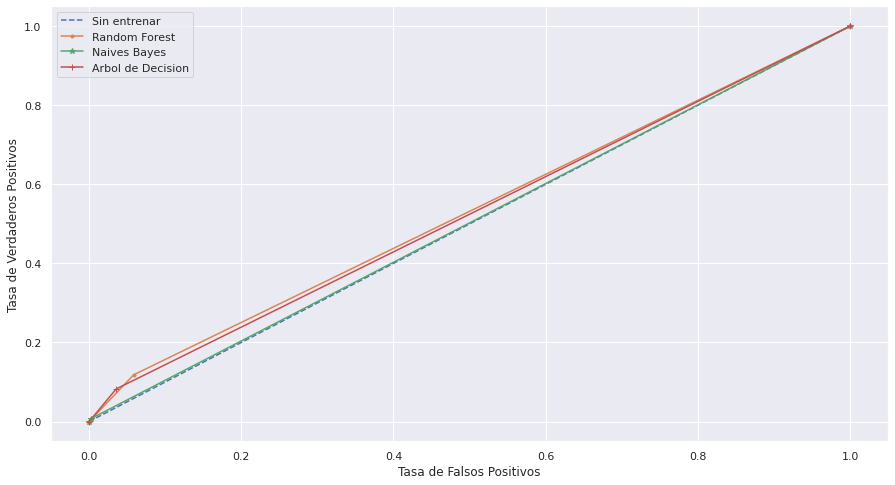

In [37]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

#Generamos un clasificador sin entrenar , que asignará 6 a todo
ns_probs = [0 for _ in range(len(y_test))]

#Calculamos el Roc_auc_score multiclase
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

#-- Calculamos el AUC
#Clasificador sin entrenar
ns_auc = multiclass_roc_auc_score(y_test, ns_probs)
#Clasificador 1
auc_pred1 = multiclass_roc_auc_score(y_test, y_pred1)
#Clasificador 2
auc_pred2 = multiclass_roc_auc_score(y_test, y_pred2)
#Clasificador 3
auc_pred3 = multiclass_roc_auc_score(y_test, y_pred3)


# Imprimimos en pantalla
print('Sin entrenar: \t\tROC AUC=%.3f' % (ns_auc))
print('Ramdon Forest: \t\tROC AUC=%.3f' % (auc_pred1))
print('Naive Bayes: \t\tROC AUC=%.3f' % (auc_pred2))
print('Arbol de Decision: \tROC AUC=%.3f' % (auc_pred3))


#-- Calculamos las curvas ROC
#Clasificador sin entrenar
ns_fpr, ns_tpr, thresholds = roc_curve(y_test, ns_probs, pos_label=1)
#Clasificador 1
pred1_fpr, pred1_tpr, thresholds = roc_curve(y_test, y_pred1, pos_label=1)
#Clasificador 2
pred2_fpr, pred2_tpr, thresholds = roc_curve(y_test, y_pred2, pos_label=1)
#Clasificador 3
pred3_fpr, pred3_tpr, thresholds = roc_curve(y_test, y_pred3, pos_label=1)


# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(pred1_fpr, pred1_tpr, marker='.', label='Random Forest')
pyplot.plot(pred2_fpr, pred2_tpr, marker='*', label='Naives Bayes')
pyplot.plot(pred3_fpr, pred3_tpr, marker='+', label='Arbol de Decision')


# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

# El área debajo de la curva (AUC) puede ser utilizado como 
# resumen de la calidad del modelo.

# <font color=dark red>**5. Conclusiones**</font> 